In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import json
import os
import seaborn as sns


In [2]:
#Reading config file to read the actual data location and if succeded read the csv file
try:
    with open ("config_file.json", 'r') as file:
        config_data = json.load(file)
        print(config_data)
        df = pd.read_csv(os.path.join(config_data['input_data_path'], "predictive_maintenance_dataset.csv"))
except (FileNotFoundError, json.JSONDecodeError) as e:
    print("Error when reading configuration file see error bellow \n")
    print(e)



{'input_data_path': 'C:/BeCode/PredictiveMain_data/', 'output_model_path': 'C:/BeCode/PredictiveMaintainance/'}


In [3]:
df.head()
    

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [18]:
unique_devices = df['device'].unique()
print(unique_devices)
print(len(unique_devices))

['S1F01085' 'S1F0166B' 'S1F01E6Y' ... 'S1F02XLX' 'S1F03499' 'W1F1DA5ÿ']
1169


In [37]:
unique_dates = df['date'].unique()
print(len(unique_dates))

304


In [21]:
fail_state = df['failure'].unique()
print(fail_state)

[0 1]


In [24]:
failed_records = df[df['failure']==1]
print(failed_records.shape[0])

106


In [26]:
unique_failed_devices = failed_records['device'].unique()
print(len(unique_failed_devices))

106


In [31]:
top_frequent = failed_records['device'].value_counts()
print(top_frequent)


device
S1F0RRB1    1
Z1F0B4XZ    1
W1F0Z3KR    1
S1F0QF3R    1
S1F0GSD9    1
           ..
S1F0DSTY    1
W1F0T074    1
W1F0NZZZ    1
Z1F0P5D9    1
W1F0T0B1    1
Name: count, Length: 106, dtype: int64


### Statistical description of the data

In [4]:
df.shape

(124494, 12)

In [5]:
df.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.492706,9.940897,1.741120,14.222669,260172.657726,0.292528,0.292528,13.013848
std,0.029167,7.045933e+07,2179.677781,185.748131,22.908507,15.943028,99151.078547,7.436924,7.436924,275.661220
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,70000.000000


### Checking for missing value

In [6]:
df.isna().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

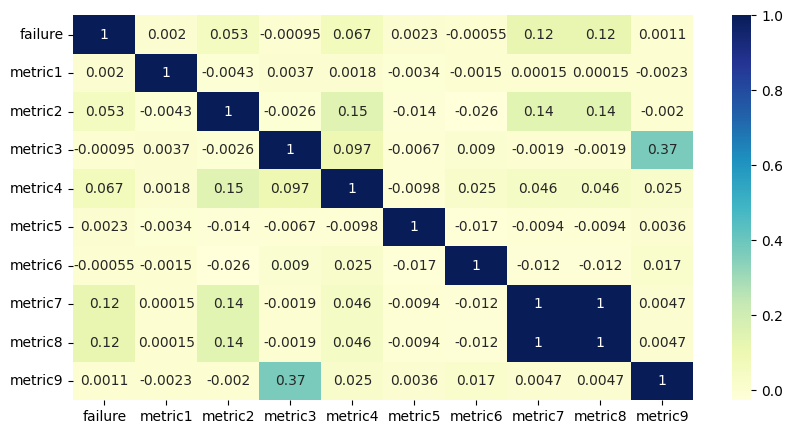

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
corr_heatmap = sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()


### Field relation ships

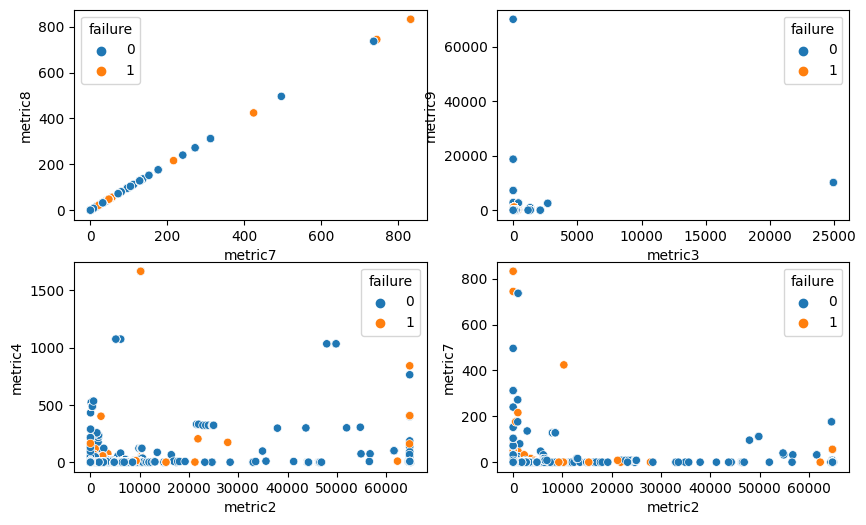

In [15]:
fig, axs = plt.subplots(2,2,figsize=(10, 6))

sns.scatterplot(x= 'metric7', y= 'metric8', hue='failure', data = df, ax=axs[0][0])
sns.scatterplot(x= 'metric3', y= 'metric9', hue='failure', data = df, ax=axs[0][1])
sns.scatterplot(x= 'metric2', y= 'metric4', hue='failure', data = df, ax=axs[1][0])
sns.scatterplot(x= 'metric2', y= 'metric7', hue='failure', data = df, ax=axs[1][1])
plt.show()

### Data distributions

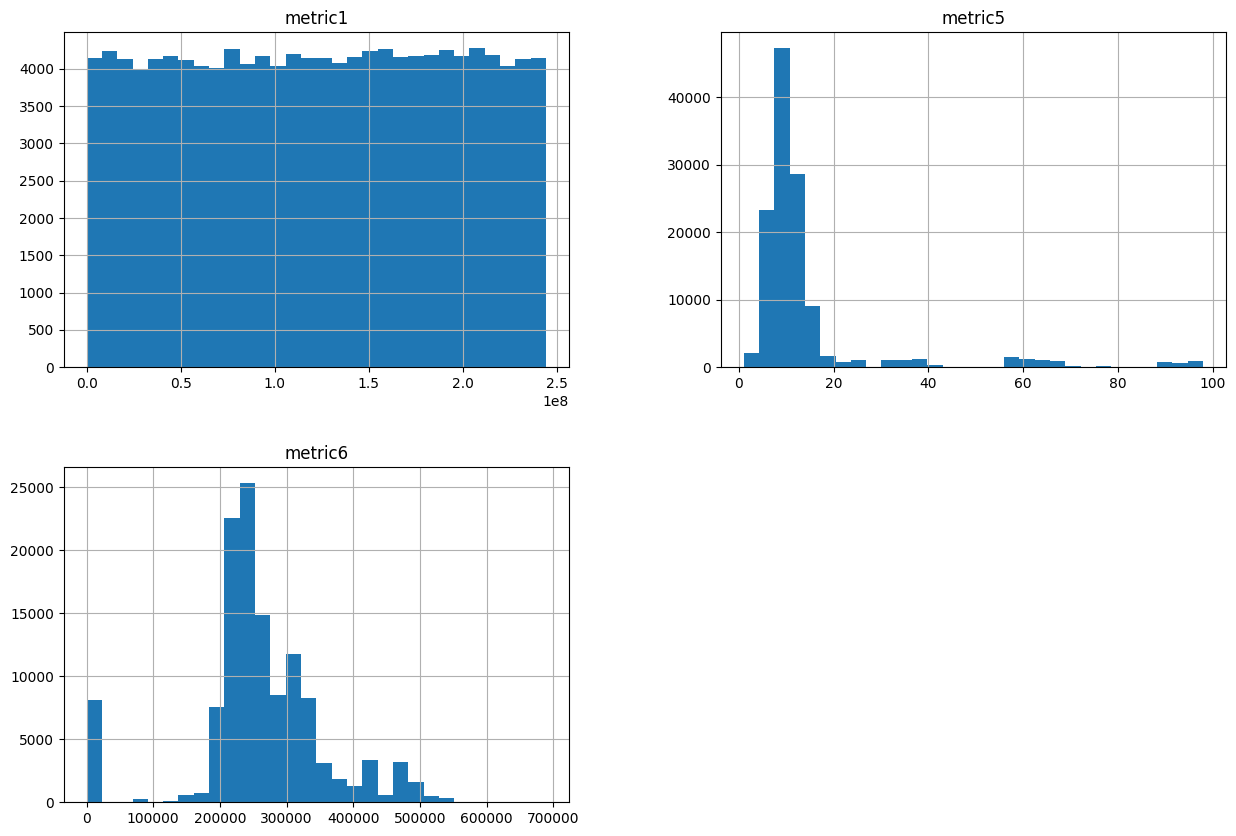

In [9]:
df.hist(column=["metric1", "metric5", "metric6"], bins=30, figsize=(15, 10))
plt.show()

In [12]:
df.columns

Index(['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9'],
      dtype='object')

### Distributions and outliers

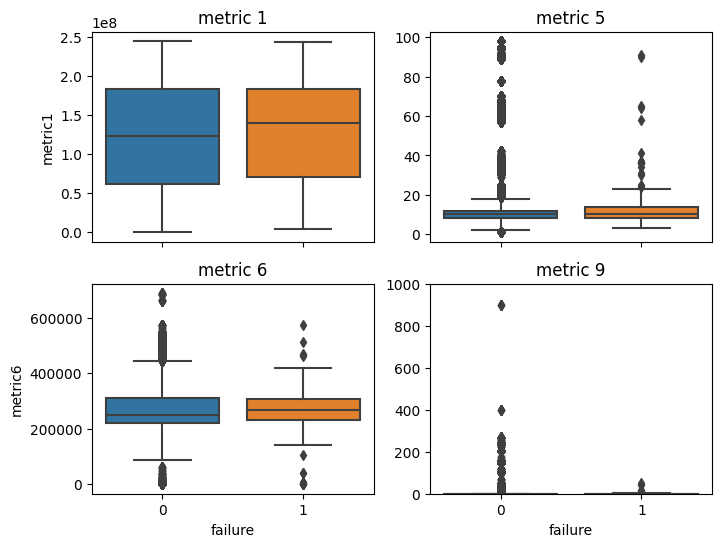

In [45]:
fig, axs = plt.subplots(2,2, figsize=(8,6), sharex=True)
bp1 = sns.boxplot(x = 'failure', y = 'metric1', data = df, ax=axs[0,0])
bp1.set(title = "metric 1")
bp1.set(xlabel=None)



bp2 = sns.boxplot(x = 'failure', y = 'metric5', data = df, ax=axs[0,1])
bp2.set(title = "metric 5")
bp2.set(xlabel=None)
bp2.set(ylabel=None)

bp3 = sns.boxplot(x = 'failure', y = 'metric6', data = df, ax=axs[1,0])
bp3.set(title = "metric 6")

bp4 = sns.boxplot(x = 'failure', y = 'metric9', data = df, ax=axs[1,1])
bp4.set(title = "metric 9")
bp4.set(ylabel=None)
bp4.set_ylim(0, 1000)

plt.show()

## Machine Learning part

In [46]:
from sklearn.model_selection import train_test_split

#### Since the failure (target) is highly imbalanced we have to handle that by downscale the dataset. By downl sampling the data we will make sure we will not miss failure hit.

<Axes: xlabel='failure', ylabel='count'>

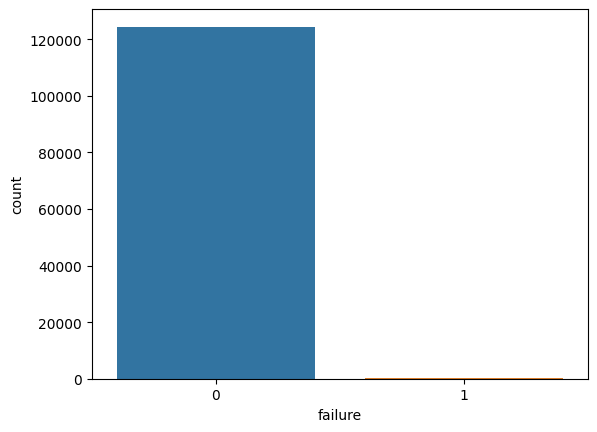

In [52]:
sns.countplot(x='failure', data=df)

In [50]:
df_selected = df.drop(['date', 'device'], axis=1)

y = df_selected['failure'].values
x = df_selected.drop(['failure'], axis=1).values

In [51]:
#Adding stratify to insure both test and train data set have same proportion as the initial data set
X_train, X_text, Y_train, Y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=0)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smt = SMOTE(random_state=2)
X_train_upsample, Y_train_upsample = smt.fit_resample(X_train, Y_train)